In [1]:
pip install pandas matplotlib seaborn prophet


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
#drop missing values
df.dropna(inplace=True)

In [8]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
#Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")

In [10]:
#Drop irrelevant columns for analysis
data = df.drop(['Row ID', 'Customer ID', 'Product ID', 'Order ID'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

Exploratory Data Analysis

Sales over time

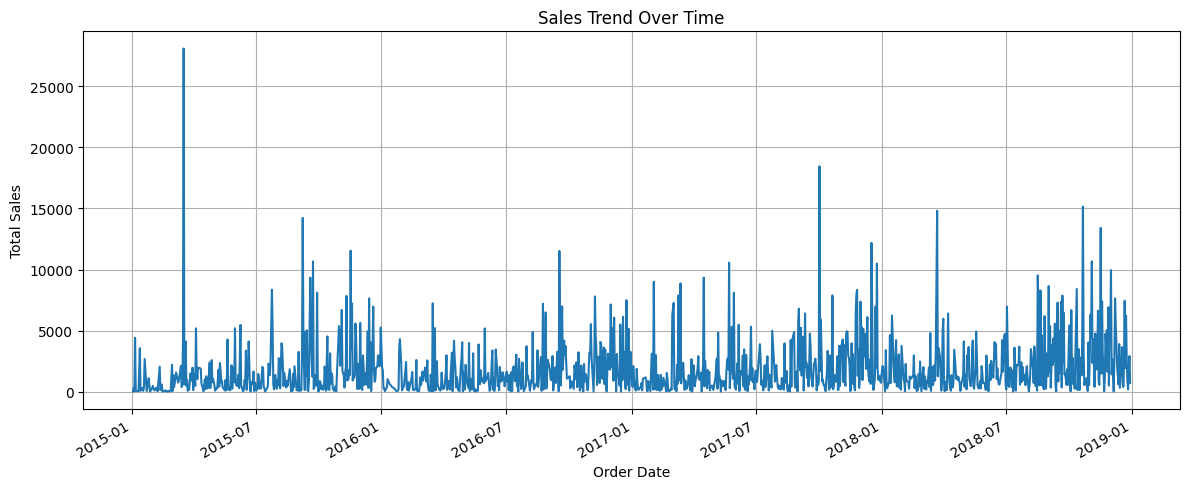

In [12]:
import matplotlib.pyplot as plt

sales_trend = data.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12, 5))
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


The sales trend from 2015 to 2019 reveals a gradually increasing pattern in daily sales volume. While sales remained volatile, the frequency and intensity of high-sales days rose over time. Notable sales peaks occurred intermittently likely aligned with special events or high-demand periods. This trend confirms business growth and customer engagement over the observed period.

Monthly sales trend

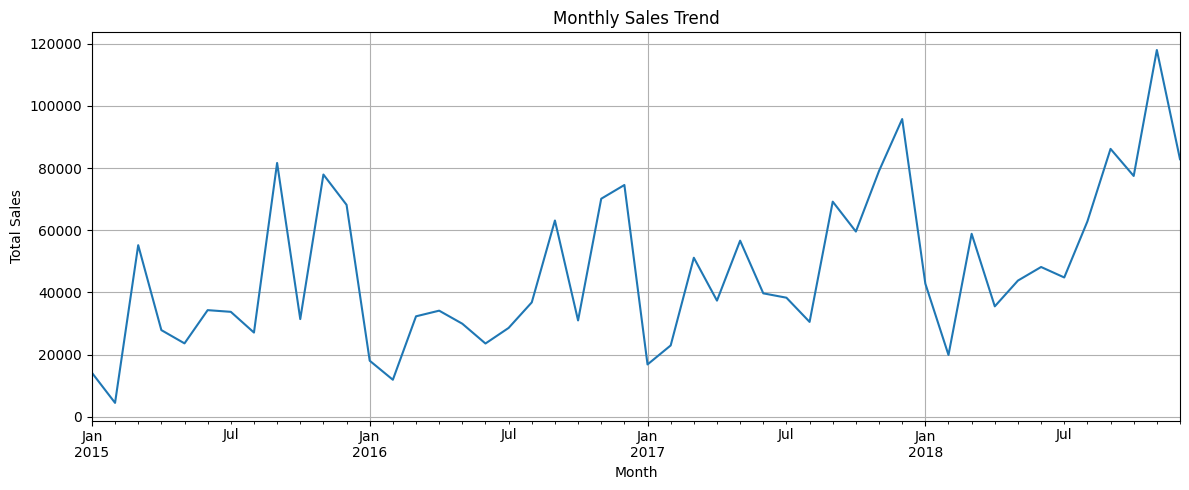

In [13]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


The monthly sales trend shows a fluctuating but overall increasing pattern from 2015 to 2019.
There are frequent sharp spikes suggesting seasonal or promotional sales peaks.
Sales remained relatively moderate until mid-2017, after which a steady upward growth is visible.
The highest sales occurred in late 2018, indicating strong year-end performance.
This suggests business expansion and growing customer demand over time.

Sales by segment

/tmp/ipython-input-14-3154325617.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Segment', y='Sales', estimator=sum, ci=None, palette='Set2')
/tmp/ipython-input-14-3154325617.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Segment', y='Sales', estimator=sum, ci=None, palette='Set2')


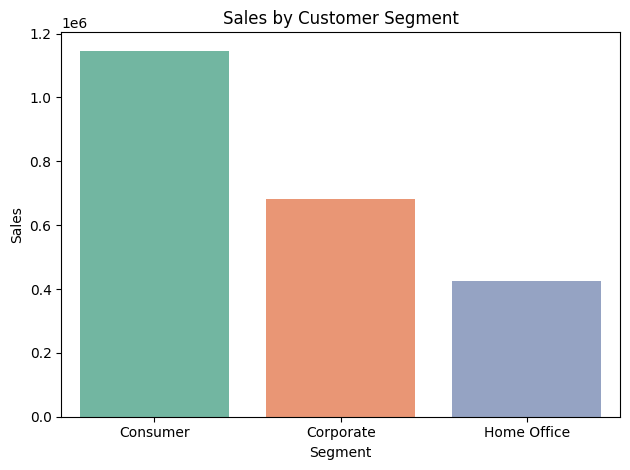

In [14]:
sns.barplot(data=df, x='Segment', y='Sales', estimator=sum, ci=None, palette='Set2')
plt.title("Sales by Customer Segment")
plt.tight_layout()
plt.show()


The Consumer segment generates the highest sales, contributing over ₹1.1 million in revenue.
This is followed by the Corporate segment, with moderate sales, and Home Office, which has the lowest.
The chart clearly indicates that consumers are the primary revenue drivers, suggesting marketing and sales strategies should focus more on them.

Sales Distribution

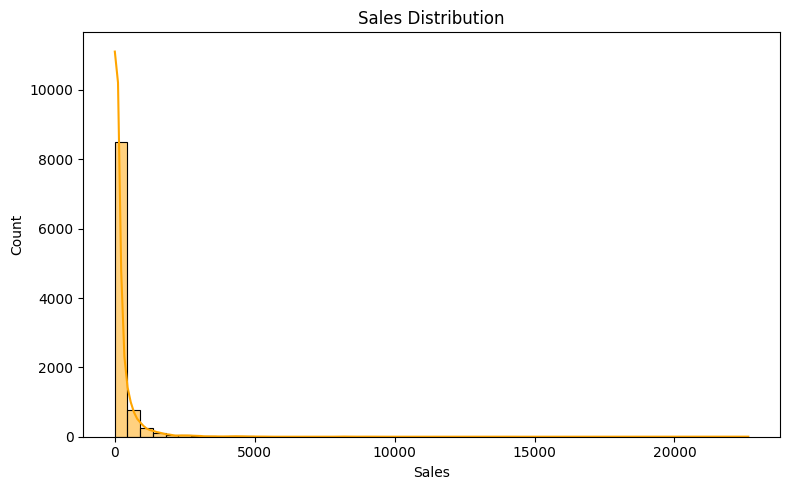

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=50, kde=True, color='orange')
plt.title("Sales Distribution")
plt.tight_layout()
plt.show()


The sales distribution is highly right-skewed, with most transactions occurring below ₹500.
Only a small number of orders have very high sales values, indicating the presence of extreme outliers.
This skewness suggests that log transformation may help in normalizing the data for forecasting models like Prophet.

Sales by Category

/tmp/ipython-input-16-2675159220.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Category', y='Sales', estimator=sum, ci=None, palette='viridis')
/tmp/ipython-input-16-2675159220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Category', y='Sales', estimator=sum, ci=None, palette='viridis')


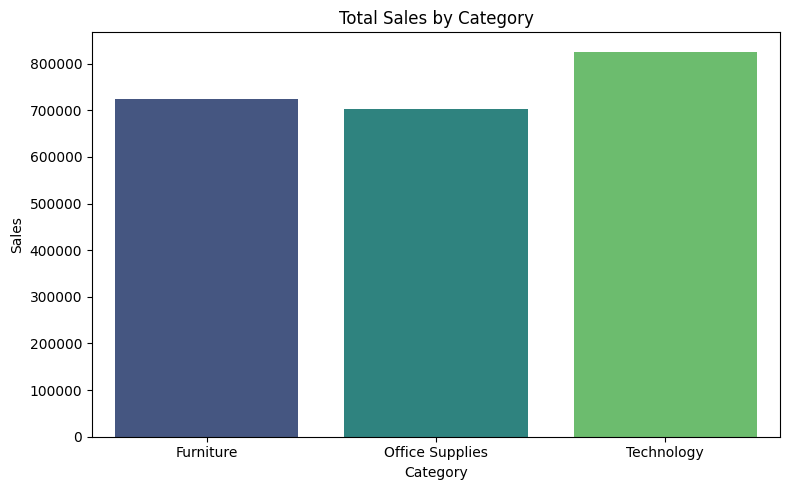

In [16]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Category', y='Sales', estimator=sum, ci=None, palette='viridis')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


The Technology category recorded the highest total sales, surpassing ₹800,000.
Furniture and Office Supplies followed closely, with fairly similar sales figures around ₹700,000.
This indicates that Technology products are the top revenue drivers, suggesting strong customer demand in that category.

sales by sub-category

/tmp/ipython-input-17-2799218612.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sub-Category', y='Sales', estimator=sum, ci=None, palette='mako')
/tmp/ipython-input-17-2799218612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sub-Category', y='Sales', estimator=sum, ci=None, palette='mako')


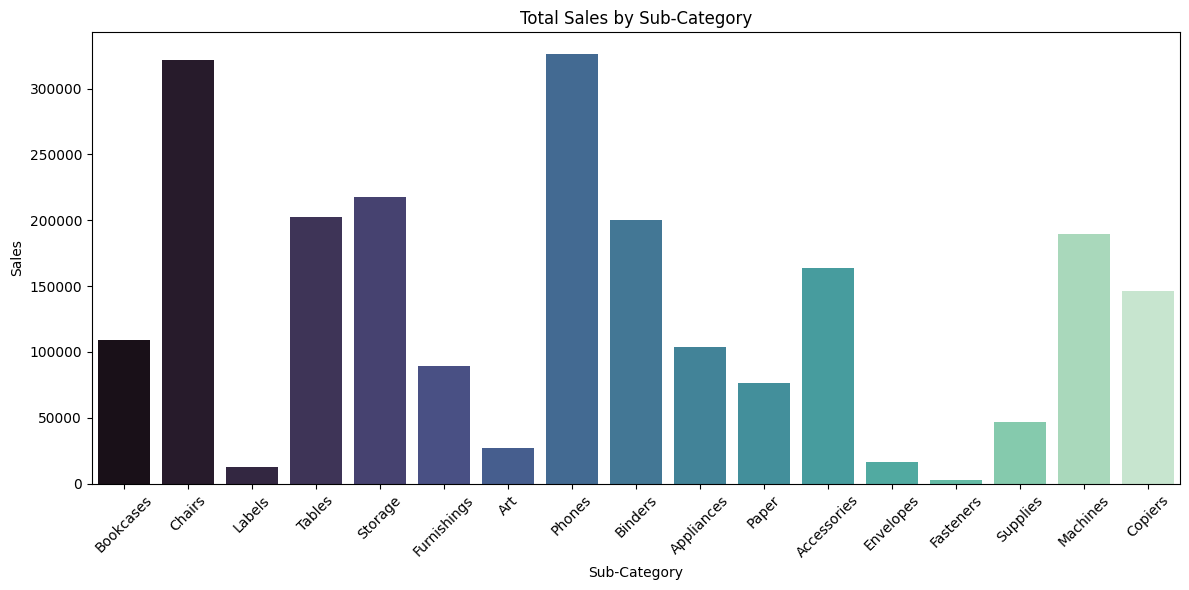

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', estimator=sum, ci=None, palette='mako')
plt.title("Total Sales by Sub-Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Phones and Chairs sub-categories dominate sales, each contributing over ₹300,000, making them the top revenue generators.
Other high-performing sub-categories include Storage, Tables, and Binders.
In contrast, items like Fasteners, Envelopes, and Labels recorded the lowest sales, indicating lesser demand.
This breakdown helps in identifying which product lines are most profitable and where to focus marketing or inventory efforts.

Top 10 States by Sales

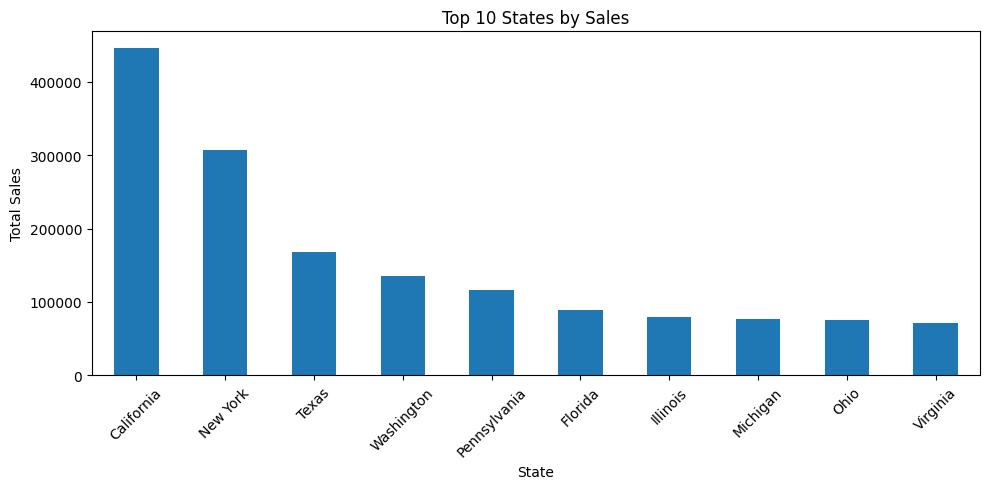

In [18]:
top_states = data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_states.plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


California leads all states with the highest total sales, exceeding ₹400,000, followed by New York and Texas.
These top-performing states significantly outperform others, making them key revenue regions.
States like Virginia, Ohio, and Michigan show comparatively lower sales, though still within the top 10.
This insight can guide regional marketing strategies and inventory planning.

Correl;ation heatmap

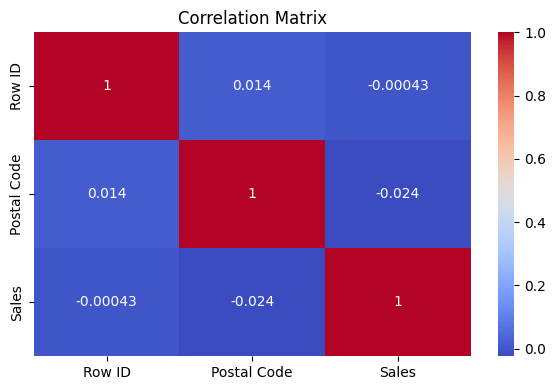

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


The heatmap shows that there is no significant correlation between Row ID, Postal Code, and Sales.

Sales has a near-zero correlation with both Row ID (-0.00043) and Postal Code (-0.024).

This indicates that these features do not influence sales and can be safely ignored in forecasting models.

The matrix confirms that only time-related features are relevant for time series forecasting.



In [20]:
# Prepare data for Prophet
df_prophet = df[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Aggregate daily sales if there are multiple orders per day
df_prophet = df_prophet.groupby('ds').sum().reset_index()

df_prophet.head()


,ds,y
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


In [21]:
# Create and train the model
model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj8kphax/c6hv0jhf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj8kphax/60l_hnyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30160', 'data', 'file=/tmp/tmpxj8kphax/c6hv0jhf.json', 'init=/tmp/tmpxj8kphax/60l_hnyk.json', 'output', 'file=/tmp/tmpxj8kphax/prophet_modelt_x6vw9r/prophet_model-20250718151458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
# Forecast for the next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


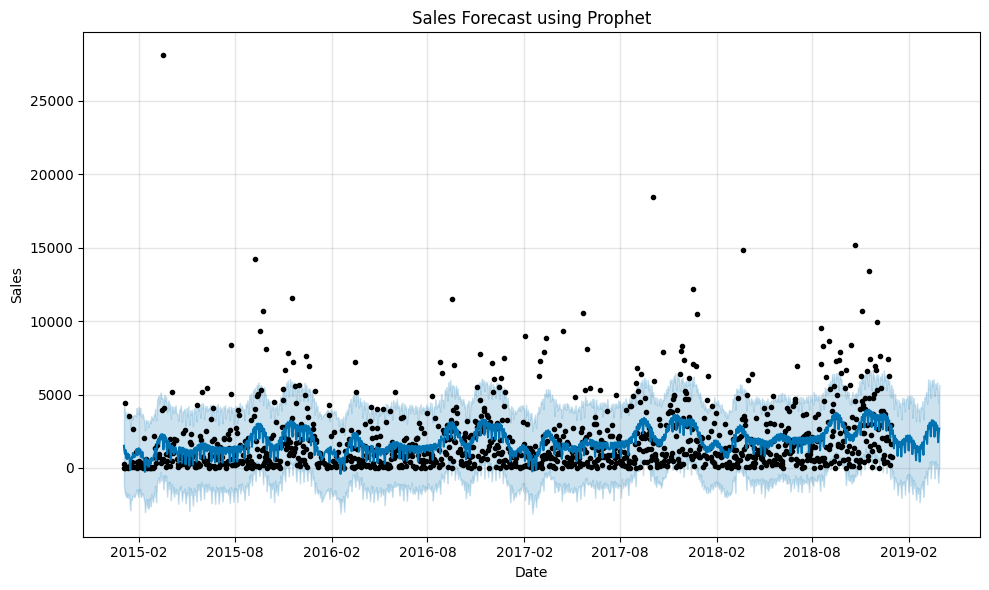

In [23]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


The black dots represent actual historical sales.

The solid blue line represents the predicted sales trend by the Prophet model.

The light blue shaded area shows the confidence interval (range of uncertainty), meaning the forecast could fall anywhere within that range.

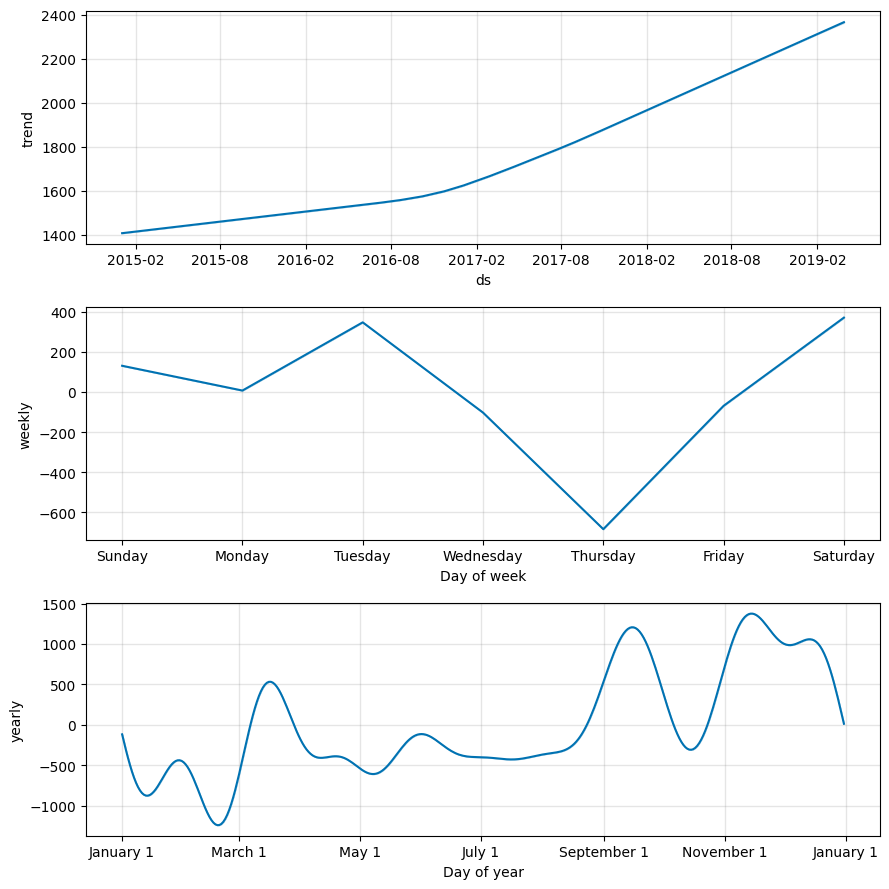

In [24]:
# Plot forecast components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()


**Trend Component (Top Plot):**

Sales have shown a steady upward trend over time.

The growth became sharper after mid-2017, indicating that the business started expanding more rapidly.

**Weekly Seasonality (Middle Plot):**

Sales are highest on Tuesdays and Saturdays, showing customer activity peaks on these days.

Sales dip on Thursdays, suggesting a mid-week slowdown.

This insight can help in planning promotions or offers on slower days like Thursday.

**Yearly Seasonality (Bottom Plot):**

There are clear seasonal spikes around March, September, and November, which could be due to:

Financial year-end (March)

Festive seasons or back-to-school periods (September)

Big holidays and shopping events (November)

Sales tend to dip in early January and mid-year (June–July).

In [26]:
from sklearn.metrics import mean_absolute_error

# Train-test split
# Find the last date in the dataset
last_date = df_prophet['ds'].max()
# Set cutoff date to one year before the last date
cutoff_date = last_date - pd.DateOffset(years=1)

train = df_prophet[df_prophet['ds'] <= cutoff_date]
test = df_prophet[df_prophet['ds'] > cutoff_date]

# Train Prophet
model = Prophet()
model.fit(train)

# Forecast into test period
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Merge forecast with actual
result = forecast[['ds', 'yhat']].merge(test, on='ds')
mae = mean_absolute_error(result['y'], result['yhat'])

print(f"MAE on Test Set: ₹{mae:,.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj8kphax/avsy4cu3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj8kphax/v8wz6m59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31923', 'data', 'file=/tmp/tmpxj8kphax/avsy4cu3.json', 'init=/tmp/tmpxj8kphax/v8wz6m59.json', 'output', 'file=/tmp/tmpxj8kphax/prophet_modelfv_h1pis/prophet_model-20250718151932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE on Test Set: ₹1,586.46


The prediction performance was evaluated using Mean Absolute Error (MAE), which came out to ₹1,586.46.

This low MAE indicates that the model made accurate predictions and captured the trends and patterns in the sales data effectively.

In [27]:
model = Prophet(daily_seasonality=True)


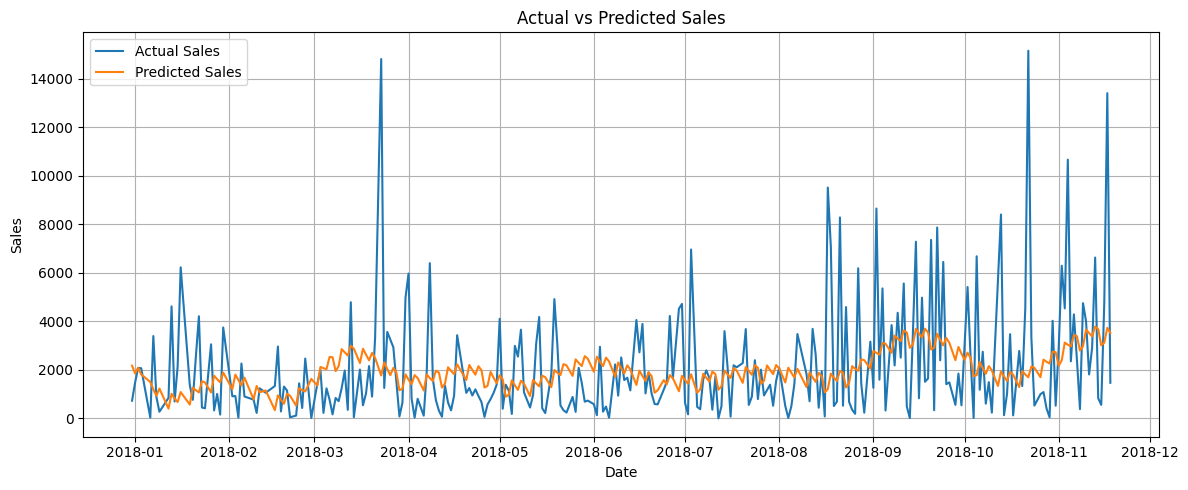

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(result['ds'], result['y'], label='Actual Sales')
plt.plot(result['ds'], result['yhat'], label='Predicted Sales')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#**Inference**

* The blue line shows the actual sales, which vary a lot and include several sharp spikes (possibly due to promotions, holidays, or bulk purchases).

* The orange line represents the sales predicted by the Prophet model.

* While the model does not capture every spike (which is expected, as they may be irregular or outliers), it closely follows the overall pattern and trend of the actual sales.

* The predicted values remain within a reasonable range and smooth out the noise, giving a clear idea of the expected sales volume over time.

* This means the model is good for forecasting general trends and seasonality, even though it may not perfectly predict sudden one-time jumps.



#**Conclusion**

In this project, we performed sales forecasting using the Prophet model on historical sales data.

Key steps included:

* Cleaning and preprocessing time-based sales data

* Performing Exploratory Data Analysis (EDA) to understand sales trends and customer segments

* Applying the Prophet model to predict future sales for the next 90 days

* Evaluating the model using Mean Absolute Error (MAE), which was ₹1,586.46, indicating good accuracy

* Visualizing the actual vs predicted sales to validate model performance

**Key Inferences:**

* The overall sales trend showed steady growth.

* Consumer segment contributed to higher sales compared to Corporate and Home Office.

* Prophet was able to capture the trend and seasonality in the data well.

* The forecasted results can help businesses make informed decisions like inventory planning, budget allocation, and sales strategy.

**Final Thoughts**

This project helped me understand how to work with time series data, how forecasting models like Prophet work, and how to evaluate model performance. These are important skills for real-world data analysis and business planning.